# **Pairing Averaged**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import Materials_Parameters as mp
from MTI_Second_Order import FMTI2_NeumannBC, Change_Basis, Block_Decomposition, Block_Reverse

# parameters
d = 100.; mu = 0.010; Delta = 0.005; L = 0.010
# coupling matrices        f = 0.
Gamma = np.matrix([[1,0],[0,1],[1,0],[0,1]])

## Finite Magnetization $\Lambda = 20$ meV

In [2]:
# shape of the matrix 
n = 4

# space dimensions
K = []; Z = []
k_dim = 100; z_dim = 100

# read file pairing
rows = np.loadtxt("pairing_L-20.txt")

# store data in matrices
F_data = np.empty((k_dim, z_dim), dtype='object')


# loop over momenta
for idx in range(k_dim):
    
    # loop over space
    for jdx in range(z_dim):

        # index for rows
        irow = z_dim * idx + jdx
                
        # read one row
        row = rows[irow]
    
        if jdx == 0: K.append(float(row[0]))
    
        if idx == 0: Z.append(float(row[1]))
    
        # real part
        real = row[2 : 2 + n*n].reshape((n, n))
        # imaginary part
        imag = row[2 + n*n :].reshape((n, n))
        # pairing matrix
        matrix = real + 1j * imag

        F_data[idx][jdx] = matrix

print(F_data.shape)

(100, 100)


#### <font color='green'> **Contour Plot** </font> 

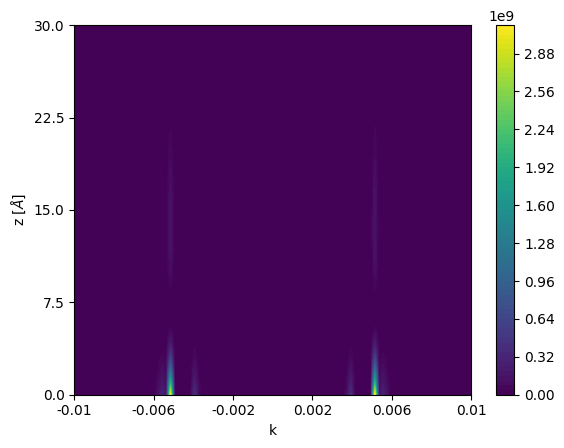

In [3]:
F = np.empty((k_dim, z_dim))

for idx in range(k_dim):
    for jdx in range(z_dim):

        F[idx][jdx] = np.linalg.norm(F_data[idx][jdx])


contour = plt.contourf(F.T, levels=100)
plt.colorbar(contour)

y_ticks = np.linspace(0, len(Z)-1, 5)
y_labels = np.linspace(Z[0], Z[-1], 5)

x_ticks = np.linspace(0, len(K)-1, 6)
x_labels = np.linspace(K[0], K[-1], 6)


plt.xticks(x_ticks, x_labels);
plt.yticks(y_ticks, y_labels);

plt.xlabel('k')
plt.ylabel('z [$\AA$]');

### **Spin Symmetry**

In [4]:
k_dim, z_dim = F_data.shape

# matrices for signlet
F_singlet = np.zeros((z_dim,4,4), dtype='complex')
# matrices for triplet
F_triplet = np.zeros((z_dim,4,4), dtype='complex')

# loop over space
for iz in range(z_dim):

    # loop over matrices in momentum 
    for f in F_data[:,iz]:

        # spin normal matrix
        f_spin = Change_Basis(f) 
        # spin swap matrix
        f_swap = Block_Reverse( Change_Basis(f) )

        # sum along k singlet matrices
        F_singlet[iz] += 0.5*(f_spin - f_swap) 
        # sum along k triplet matrices
        F_triplet[iz] += 0.5*(f_spin + f_swap) 

print(F_singlet.shape, F_triplet.shape)

(100, 4, 4) (100, 4, 4)


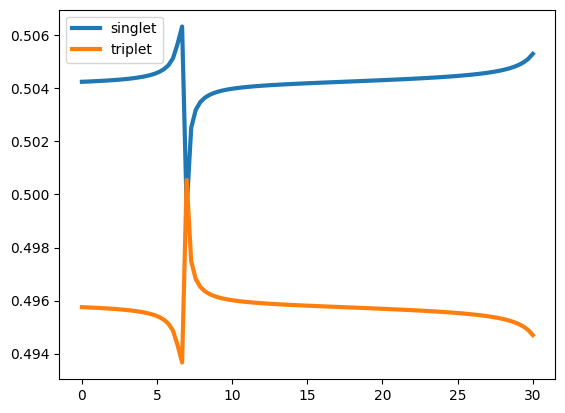

In [5]:
# norm of singlet
fs = np.array([np.linalg.norm(f) for f in F_singlet])
# norm of triplet
ft = np.array([np.linalg.norm(f) for f in F_triplet])

plt.plot(Z, fs/(fs+ft), lw=3, label='singlet')
plt.plot(Z, ft/(fs+ft), lw=3, label='triplet')

#plt.ylim(0,1.)
plt.legend();

#### **Triplet Components**

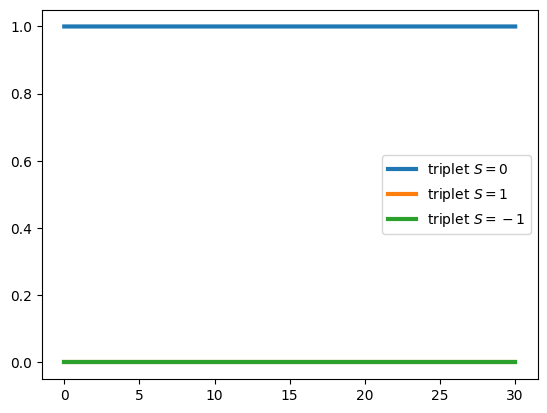

In [6]:
ft_0 = []; ft_p1 = []; ft_m1 = []

for f in F_triplet:

    # block decomposition
    fuu, fud, fdu, fdd = Block_Decomposition(f)
    
    # total spin S=1
    ft_p1.append(np.linalg.norm(fuu))
    # total spin S=-1
    ft_m1.append(np.linalg.norm(fdd))

    # total spin S=0 matrix
    ft0_mat = 0.5 * np.block([[np.zeros((2,2)), fud],[fdu, np.zeros((2,2))]])
    # total spin S=0
    ft_0.append(np.linalg.norm(ft0_mat))    


ft_p1 = np.array(ft_p1); ft_m1 = np.array(ft_m1); ft_0 = np.array(ft_0)

norm = ft_p1 + ft_m1 + ft_0


plt.plot(Z, ft_0/norm, lw=3, label='triplet $S=0$')
plt.plot(Z, ft_p1/norm, lw=3, label='triplet $S=1$')
plt.plot(Z, ft_m1/norm, lw=3, label='triplet $S=-1$')

#plt.ylim(0,1.)
plt.legend();

### **Momentum Symmetry**

In [7]:
k_dim, z_dim = F_data.shape

# matrices for signlet
F_even = np.zeros((z_dim,4,4), dtype='complex')
# matrices for odd components
F_odd = np.zeros((z_dim,4,4), dtype='complex')

# loop over space
for iz in range(z_dim):

    # loop over matrices in momentum 
    for ik in range(k_dim):

        # spin normal matrix
        f_k = Change_Basis(F_data[ik][iz]) 
        # spin swap matrix
        f_kinv = Change_Basis(F_data[-ik-1][iz])
        
        # sum along k odd matrices
        F_odd[iz] += 0.5*(f_k - f_kinv) 
        # sum along k even matrices
        F_even[iz] += 0.5*(f_k + f_kinv) 

print(F_even.shape, F_odd.shape)

(100, 4, 4) (100, 4, 4)


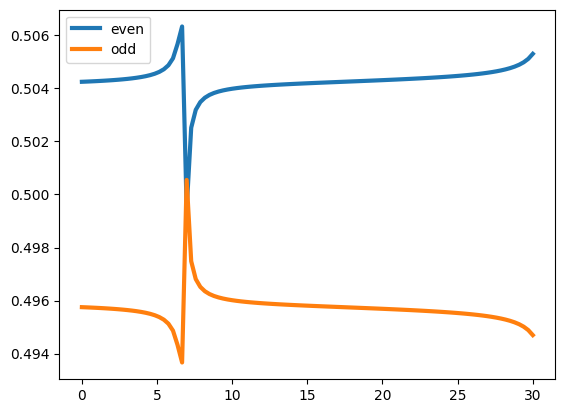

In [8]:
# norm of even
fe = np.array([np.linalg.norm(f) for f in F_singlet])
# norm of odd
fo = np.array([np.linalg.norm(f) for f in F_triplet])

plt.plot(Z, fe/(fe+fo), lw=3, label='even')
plt.plot(Z, fo/(fe+fo), lw=3, label='odd')

#plt.ylim(0,1.)
plt.legend();